# Introduction to the capstone project :Interpreting Customer Feedback
There has always been competition amongst all organizations to provide the best product and service to it's customers.This not only helped them to stay in business but also grow and increase their revenue. In this reguard <b>customer feedback</b> has become an important tool which provides important insights of their  day to day activity, identify problems, understand market trends and also deploy varoius solutions without hampering their business. Many organizations were also able evaluate their employee performance and provide timely traning.  

Data has been collected through various means from verbal exchange to digital platforms. With the introduction of the internet especially in mobile devices the amount of data has grown exponentially in the last decade. As a result it has been a challenge for the organizations to go through each data,  analysize it and extract useful informations.  

In this capstone project: <b>Interpreting Customer Feedback</b> an attempt has been made to apply natural language processing(nlp) to analyse and interpret the customer data and also predict the sentiment of the custmer based on the review of the customer. The dataset used, called <b>Amazon Fine Foods Review</b> has been downloaded from [kaggle website](https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews?select=Reviews.csv).  

The analysis has been divided into three sections:
1. Feature Engineering: Here we clean the data, drop unnecessary features and form new features.  
2. Data Exploration: Here we collect and visualize important insights from the dataset  
3. Model Building: Here we apply text embedding techniques and machine learning models on historical data to predict customer sentiments on unseen data. 

All analysis has been done on Python using Jupyter Notebook and VSCode. Feature Engineering and Data Exploration has been done on this file and Model building on a seperate file. After the model is built, it has been deployed locally using Flask framework.

# Contents
1. [Featuring Engineering](#feature_engineering)  
> 1.1 [Loading and reading the dataset](#read)  
1.2 [Shape of the dataset](#shape)  
1.3 [Features of the dataset](#features)  
1.4 [Handling Null Value](#null)  
1.5 [Analyzing the Summary Feature will Null Value](#summary_null)  
1.6 [Drping Summary and Text features and creating a new feature: Review](#droping_sum_text)  
1.7 [handling Helpfulness column](#help)  
1.8 [Handling Time Column](#time)  
1.9 [Handling Score Column](#score)  
1.10 [Cleaning the textual data](#clean_text)  
> 1.11 [Removing Stopwords](#remove_stop)  
2. [Data Exploration](#data_exp)  
> 2.1 [Sentiment vs Helpfulness](#sentivshelp)  
2.2 [Count Vs Score](#count_score)  
2.3 [Count vs Time](#count_time)  
2.4 [Year vs Sentiment analysis](#year_senti)  
2.5 [Texual Data Exploration](#text_data)  
2.5.1 [Character length of each Review](#char_len)  
2.5.2 [Word Length of each Review](#word_len)  
2.5.3 [Monogram analysis](#monogram)  
2.5.4 [Bigram analysis](#bigram)  
2.5.5 [Trigram analysis](#trigram)  
2.6 [Data visualization using wordcloud](#wordcloud)   
> 2.7 [Saving the clean data as Pandas DataFrame](#saving_data)  
    


<a id='feature_engineering'></a>
## 1. Feature engineering

<a id='read'></a>

### 1.1  Loading and reading the dataset 
The data file given is about the review of the fine food which were bought in Amazon. The dataset is downloaded from kaggle website. The dataset contains data 10 features and more than 5,00,000 reviews which were collected over 10 years.

In [1]:
import pandas as pd
data = pd.read_csv(r"C:\Users\rezaa\Videos\Captures\12.AI\1.NLP\5th-spacy\6. NLP PROJECTS\NLP TASKS\TASK - 57\Reviews.csv")
data.head(5)

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

<a id='shape'></a>
### 1.2 Shape of the dataset

In [2]:
row, col = data.shape
print(f'The dataset contains \n\n\t{row} rows \n\t{col} columns')

The dataset contains 

	568454 rows 
	10 columns


<a id='features'></a>
### 1.3 Features of the dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [4]:
features = data.columns.values
print(f'The dataset contains the following {len(features)} features :\n{features}')

The dataset contains the following 10 features :
['Id' 'ProductId' 'UserId' 'ProfileName' 'HelpfulnessNumerator'
 'HelpfulnessDenominator' 'Score' 'Time' 'Summary' 'Text']


Out of the given features some of the features can be further explored.  
* Id : The id(primary or foreign key) related to the database from where the data has been aquired
* ProductId: The product identification number
* UserId: The identification number of the customer
* ProfileName: Profile name of the product
* HelpfulnessNumerator: Number of people found the review helpful
* HelpfulnessDenominator: Total number of customer viewed the review
* Score: The ratings of the product between 1 to 5, where 1 is poor and 5 is excellent
* Time: The time of posting the review in Unix time
* Summery: Gist of the review
* Text: Actual review

<a id='null'></a>
### 1.4 Handling the null value

Total number of null value in each columns

In [5]:
data.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

Out of the all features only <b>ProfileName and Summary</b> has null value. The ProfileName adds litte information to our analysis, so this will not create much problem. But we will have to llok into the Summary section.

<a id='summary_null'></a>
### 1.5 Analysing the Summary Section with Null value

The following dataset contains null value in the summary section

In [6]:
data[data['Summary'].isnull()].head(5)

Id   ProductId          UserId                     ProfileName  \
33958    33959  B00412W76S  A3TJPSWY2HE4BS  S. Layton "homeschool blogger"   
40548    40549  B00020HHRW  A3TJPSWY2HE4BS  S. Layton "homeschool blogger"   
101106  101107  B0014B0HWK  A3TJPSWY2HE4BS  S. Layton "homeschool blogger"   
102979  102980  B000FVDWU4  A3TJPSWY2HE4BS  S. Layton "homeschool blogger"   
117515  117516  B0016B7Z32  A3TJPSWY2HE4BS  S. Layton "homeschool blogger"   

        HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
33958                      1                      24      2  1173312000   
40548                      1                      24      2  1173312000   
101106                     1                      24      2  1173312000   
102979                     1                      24      2  1173312000   
117515                     1                      24      2  1173312000   

       Summary                                               Text  
33958      NaN  I only used two maybe three tea bags and got p...  
40548      NaN  I only used two maybe three tea bags and got p...  
101106     NaN  I only used two maybe three tea bags and got p...  
102979     NaN  I only used two maybe three tea bags and got p...  
117515     NaN  I only used two maybe three tea bags and got p...

<b>Changing all the nan values to blank string</b>

In [7]:
data['Summary'] = data['Summary'].fillna('')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568454 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


<a id='droping_sum_text'></a>
### 1.6 Droping Summary and Text features and creating a new feature called 'Review'

Since the Summary feature is a description of the Text feature it is better that instead of having two features we can merge them into one. This reduces the information complexity and simplifying our dataset.

In [8]:
data['Summary'].apply(lambda x: len(str(x))).describe()

count    568454.000000
mean         23.445744
std          14.028662
min           0.000000
25%          13.000000
50%          20.000000
75%          30.000000
max         128.000000
Name: Summary, dtype: float64

In [9]:
data['Text'].apply(lambda x: len(str(x))).describe()

count    568454.000000
mean        436.222083
std         445.339741
min          12.000000
25%         179.000000
50%         302.000000
75%         527.000000
max       21409.000000
Name: Text, dtype: float64

As we can see the number of characters in 'Summary' is 23(mean) whereas the 'Text' has 436(mean) charcters. So the 'Summary' columns has less information as compared to 'Text' column. The both columns can be merged into a new feature called Review. Moreover Id, ProductId, UserId, ProfileName can also be dropped.

In [10]:
data['Review'] = data['Summary']+ ' ' + data['Text']
data = data.drop(columns = ['Id','ProductId','UserId', 'ProfileName', 'Summary', 'Text'])
data.head()

HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                                              Review  
0  Good Quality Dog Food I have bought several of...  
1  Not as Advertised Product arrived labeled as J...  
2  "Delight" says it all This is a confection tha...  
3  Cough Medicine If you are looking for the secr...  
4  Great taffy Great taffy at a great price.  The...

<a id='help'></a>
### 1.7 Handling Helpfulness column

There are two helpfulness column. This can be reduced as a ratio of the numerator to denominator and simplify our study. We also need to check if there is any incorrect value. The HelpfulnessNumerator value should always be smaller or atmost equal to HelfulnessDenominator value. 

In [11]:
data[data['HelpfulnessNumerator'] > data['HelpfulnessDenominator']]

HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
44736                     3                       2      4  1212883200   
64421                     3                       1      5  1224892800   

                                                  Review  
44736  Pure cocoa taste with crunchy almonds inside I...  
64421  Bought This for My Son at College My son loves...

Here we find that there are two rows where the data is miss represented. I think the values need to be swapped as it has been incorrectly filled

In [12]:
data.iloc[44736,0] , data.iloc[44736,1] = data.iloc[44736,1] , data.iloc[44736,0]
data.iloc[64421,0] , data.iloc[64421,1] = data.iloc[64421,1] , data.iloc[64421,0]

print(data.iloc[44736])
print('-'*100)
print(data.iloc[64421])

HelpfulnessNumerator                                                      2
HelpfulnessDenominator                                                    3
Score                                                                     4
Time                                                             1212883200
Review                    Pure cocoa taste with crunchy almonds inside I...
Name: 44736, dtype: object
----------------------------------------------------------------------------------------------------
HelpfulnessNumerator                                                      1
HelpfulnessDenominator                                                    3
Score                                                                     5
Time                                                             1224892800
Review                    Bought This for My Son at College My son loves...
Name: 64421, dtype: object


Forming a new feature called Helpfulness which is the ratio between HelpfulnessNumerator and HelpfulnessDenominator

In [13]:
data['Helpfulness'] = data['HelpfulnessNumerator'] / data['HelpfulnessDenominator']
data = data.drop(columns = ['HelpfulnessNumerator','HelpfulnessDenominator'])
data.head(5)

Score        Time                                             Review  \
0      5  1303862400  Good Quality Dog Food I have bought several of...   
1      1  1346976000  Not as Advertised Product arrived labeled as J...   
2      4  1219017600  "Delight" says it all This is a confection tha...   
3      2  1307923200  Cough Medicine If you are looking for the secr...   
4      5  1350777600  Great taffy Great taffy at a great price.  The...   

   Helpfulness  
0          1.0  
1          NaN  
2          1.0  
3          1.0  
4          NaN

Handling the NaN values

In [14]:
data['Helpfulness'] = data['Helpfulness'].fillna(0)
data.head(5)

Score        Time                                             Review  \
0      5  1303862400  Good Quality Dog Food I have bought several of...   
1      1  1346976000  Not as Advertised Product arrived labeled as J...   
2      4  1219017600  "Delight" says it all This is a confection tha...   
3      2  1307923200  Cough Medicine If you are looking for the secr...   
4      5  1350777600  Great taffy Great taffy at a great price.  The...   

   Helpfulness  
0          1.0  
1          0.0  
2          1.0  
3          1.0  
4          0.0

<a id='time'></a>
### 1.8 Handling the Time column

The Time column is given in UNIX time. This can be converted into human readable formate using the Python datetime module. Four new features have been added which are year, month, date and day. The Time feature is dropped.

In [15]:
from datetime import datetime, time
data['year'] = data['Time'].apply(lambda x: datetime.fromtimestamp(x).year)
data['Month'] = data['Time'].apply(lambda x: datetime.fromtimestamp(x).month)
data['Date'] = data['Time'].apply(lambda x: datetime.fromtimestamp(x).day)
data['Day'] = data['Time'].apply(lambda x: datetime.fromtimestamp(x).strftime("%a"))
data = data.drop(columns=['Time'])
data.head(5)

Score                                             Review  Helpfulness  \
0      5  Good Quality Dog Food I have bought several of...          1.0   
1      1  Not as Advertised Product arrived labeled as J...          0.0   
2      4  "Delight" says it all This is a confection tha...          1.0   
3      2  Cough Medicine If you are looking for the secr...          1.0   
4      5  Great taffy Great taffy at a great price.  The...          0.0   

   year  Month  Date  Day  
0  2011      4    27  Wed  
1  2012      9     7  Fri  
2  2008      8    18  Mon  
3  2011      6    13  Mon  
4  2012     10    21  Sun

<a id='score'></a>
###  1.9 Handling the Score column

The number of unique values of the score value.

In [16]:
data['Score'].unique()

array([5, 1, 4, 2, 3], dtype=int64)

There are 5 unique values for the score. The score is a rating of the product. We are trying to understand a relation between the review of the product and the sentiment of the customer. Since there is no information about the sentiment we form an assumption that if the score is higher the sentiment of the customer is positive , if it is lower the sentiment is negative else the sentiment is neutral. Here we have given 1,2 as negative sentiment, 3 as neutral sentiment and 4,5 as positive sentiment.

In [17]:
def data_senti(x):
    if x in [1, 2 ]:
        sentiment = 'negative'
    elif x == 3:
        sentiment = 'neutral'
    else:
        sentiment = 'positive'
        
    return sentiment

data['sentiment'] = data['Score'].apply(data_senti)
data.head(5)

Score                                             Review  Helpfulness  \
0      5  Good Quality Dog Food I have bought several of...          1.0   
1      1  Not as Advertised Product arrived labeled as J...          0.0   
2      4  "Delight" says it all This is a confection tha...          1.0   
3      2  Cough Medicine If you are looking for the secr...          1.0   
4      5  Great taffy Great taffy at a great price.  The...          0.0   

   year  Month  Date  Day sentiment  
0  2011      4    27  Wed  positive  
1  2012      9     7  Fri  negative  
2  2008      8    18  Mon  positive  
3  2011      6    13  Mon  negative  
4  2012     10    21  Sun  positive

<a id='clean_text'></a>
###  1.10 Cleaning the textual data

Since all the basic feature engineering is done the next step will be to preprocess the textual data. The first thing we do is convert the text into lowercase, remove brackets, remove any hyperlinks, remove html tags, remove punctuations and remove any word containing digits.

In [18]:
import re
from string import punctuation
def txt_clean(x):
    x = x.lower() #convert to lower case
    x = re.sub('\[.*?\]','', x) #remove [] and anything in between the brackets
    x = re.sub('www\S+|https?\S+', '', x) #remove links
    x = re.sub('\<.*?\>', '', x) #remove html tags
    x = re.sub(f'[{re.escape(punctuation)}]', '',x) #remove punctuations
    x = re.sub('\n','',x) #remove new line
    x = re.sub('\w*\d+\w*','',x) #remove and word containing numbers
    
    return x

data['Review'] = data['Review'].apply(txt_clean)
data.head(5)

Score                                             Review  Helpfulness  \
0      5  good quality dog food i have bought several of...          1.0   
1      1  not as advertised product arrived labeled as j...          0.0   
2      4  delight says it all this is a confection that ...          1.0   
3      2  cough medicine if you are looking for the secr...          1.0   
4      5  great taffy great taffy at a great price  ther...          0.0   

   year  Month  Date  Day sentiment  
0  2011      4    27  Wed  positive  
1  2012      9     7  Fri  negative  
2  2008      8    18  Mon  positive  
3  2011      6    13  Mon  negative  
4  2012     10    21  Sun  positive

<a id='remove_stop'></a>
### 1.11 Remove stopwords

Stopwords are words which adds very little meaning to the overall sense of the sentence. So it is better to remove all such words. We are using NTLK library to remove the stopwords but this also contains many negative words which we are trying to retain as the sentiment of a customer can totally change if we remove all the stopwords blindly.

In [19]:
from nltk.corpus import stopwords
sw = stopwords.words('english')
sw_neg = ["not","don't","aren't","couldn't","didn't","doesn't","hadn't","hasn't","haven't","isn't","mightn't","mustn't","shan't",
          "shouldn't","wasn't","weren't","won't","wouldn't"]
sw = set(sw) - set(sw_neg)
sw = {txt_clean(word) for word in sw}

from nltk.tokenize import word_tokenize

def remove_stop(x):
    words = word_tokenize(x)
    words_no_stop = [word for word in words if word not in sw]
    
    return ' '.join(words_no_stop)

In [20]:
data['Review'] = data['Review'].apply(remove_stop)
data.head(5)

Score                                             Review  Helpfulness  \
0      5  good quality dog food bought several vitality ...          1.0   
1      1  not advertised product arrived labeled jumbo s...          0.0   
2      4  delight says confection around centuries light...          1.0   
3      2  cough medicine looking secret ingredient robit...          1.0   
4      5  great taffy great taffy great price wide assor...          0.0   

   year  Month  Date  Day sentiment  
0  2011      4    27  Wed  positive  
1  2012      9     7  Fri  negative  
2  2008      8    18  Mon  positive  
3  2011      6    13  Mon  negative  
4  2012     10    21  Sun  positive

<a id='data_exp'></a>
## 2 Data Exploration

Once the dataset has been cleared the next step will be to extract the information from the cleaned datset and visualize the insights.

<a id='sentivshelp'></a>
### 2.1 Sentiment vs Helpfulness

Looking into the mean helpfulness value per snetiment

In [21]:
pd.DataFrame(data.groupby('sentiment')['Helpfulness'].mean())

Helpfulness
sentiment             
negative      0.395239
neutral       0.355267
positive      0.415241

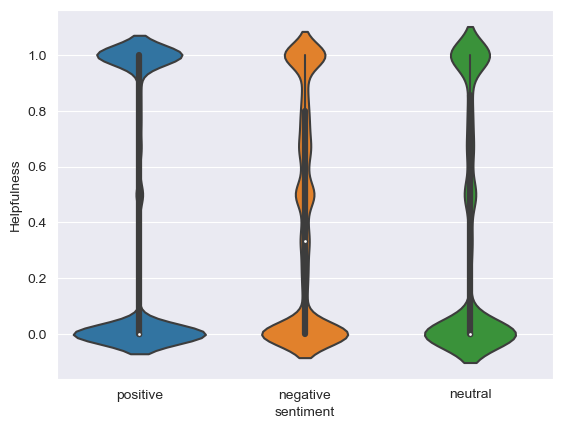

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

sns.violinplot(data=data, x='sentiment', y='Helpfulness');

From the above plot we see that most of the frequency of data is around 0 and 1. As a result we are getting the mean around 0.4.

<a id='count_score'></a>
### 2.2 Plotting the count vs Score

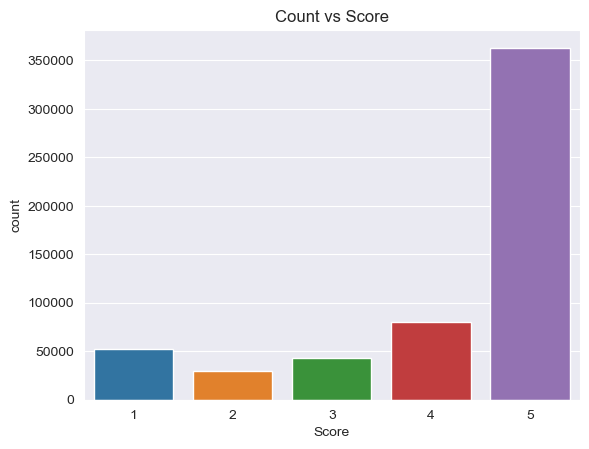

In [24]:
sns.countplot(data = data,x='Score')
plt.title('Count vs Score');

Most of the ratings given is 5. From the above analysis it can be said that the dataset is highly <b>imbalanced</b>.

<a id='count_time'></a>
### 2.3 Count vs Time

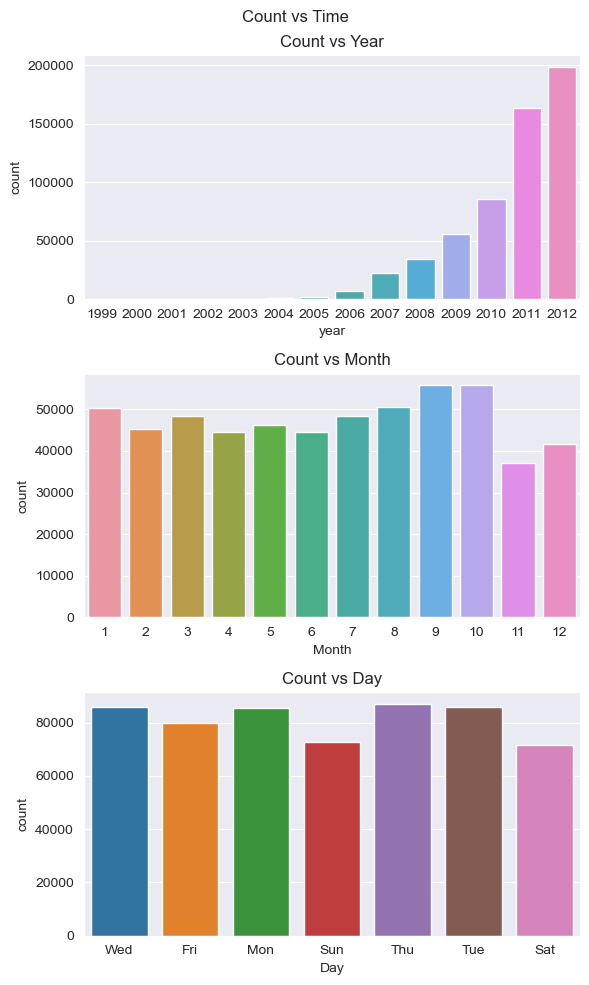

In [25]:
fig, axs = plt.subplots(3,figsize=(6,10),layout="tight")


sns.countplot(data = data,x='year',ax=axs[0])
axs[0].set_title('Count vs Year')
sns.countplot(data = data,x='Month',ax=axs[1])
axs[1].set_title('Count vs Month')
sns.countplot(data = data,x='Day',ax=axs[2])
axs[2].set_title('Count vs Day')
fig.suptitle('Count vs Time');

From the count vs year plot we can see that as the years increases the amount of data also increases exponentially. This confirms that as we go into the future the complexity of the analysis also increases and such analysis cannot be handle by humans alone.

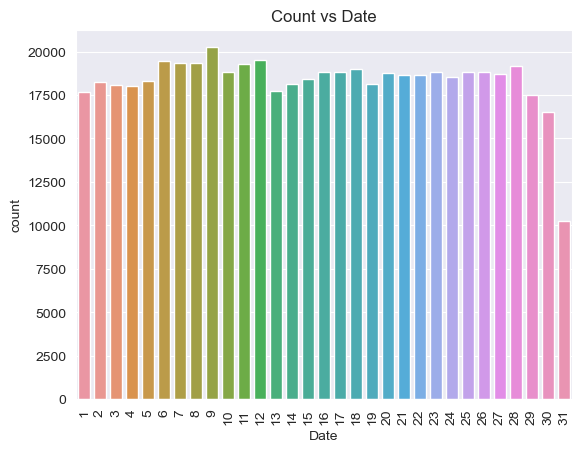

In [26]:
sns.countplot(data = data,x='Date')
plt.xticks(rotation=90)
plt.title('Count vs Date');

<a id='year_senti'></a>
### 2.4 Year vs sentiment analysis

In [27]:
data.groupby(['year','sentiment'])['sentiment'].count().unstack()

sentiment  negative  neutral  positive
year                                  
1999            NaN      NaN       6.0
2000            3.0      NaN      29.0
2001            4.0      1.0       8.0
2002            3.0      NaN      70.0
2003           12.0      8.0     112.0
2004           58.0     18.0     485.0
2005          142.0     53.0    1140.0
2006          783.0    428.0    5460.0
2007         2164.0   1326.0   18810.0
2008         3542.0   2171.0   28450.0
2009         6496.0   3762.0   45068.0
2010        12317.0   6248.0   67319.0
2011        24937.0  13022.0  125340.0
2012        31576.0  15603.0  151480.0

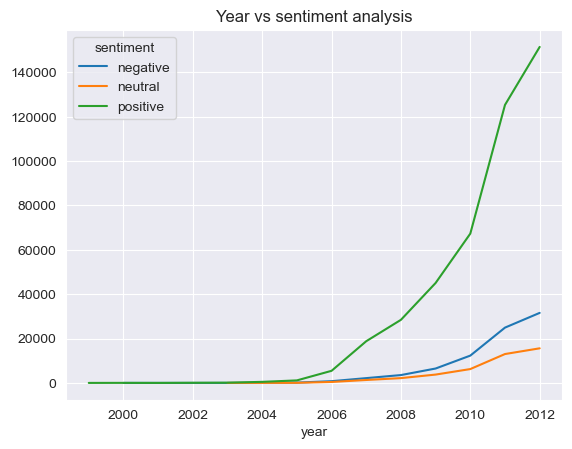

In [28]:
data.groupby(['year','sentiment'])['sentiment'].count().unstack().plot()
plt.title('Year vs sentiment analysis');

<a id='text_data'></a>
### 2.5 Texual data explorations

<a id='text_data'></a>
#### 2.5.1 Character length of each review

In [29]:
data['Review character length'] = data['Review'].apply(len)
data.head(5)

Score                                             Review  Helpfulness  \
0      5  good quality dog food bought several vitality ...          1.0   
1      1  not advertised product arrived labeled jumbo s...          0.0   
2      4  delight says confection around centuries light...          1.0   
3      2  cough medicine looking secret ingredient robit...          1.0   
4      5  great taffy great taffy great price wide assor...          0.0   

   year  Month  Date  Day sentiment  Review character length  
0  2011      4    27  Wed  positive                      186  
1  2012      9     7  Fri  negative                      155  
2  2008      8    18  Mon  positive                      302  
3  2011      6    13  Mon  negative                      143  
4  2012     10    21  Sun  positive                       95

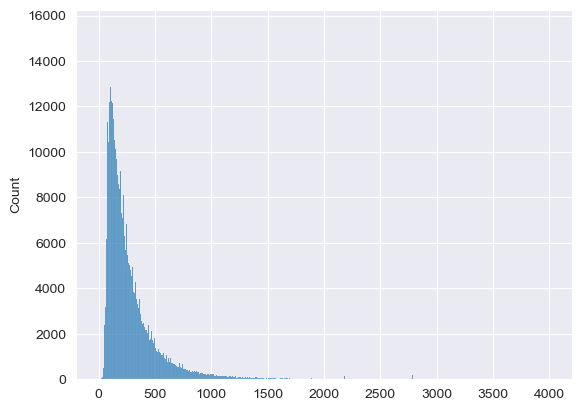

In [30]:
sns.histplot(data=data['Review character length'].values, binrange=(0,4000));

In [31]:
data['Review character length'].values.max()

14823

The plot is highly skewed towards left. Most of the reviews were 0 to 1000 characters long eventhough the maximum length of characters is around 14000 long

<a id='text_len'></a>
#### 2.5.2 Word Length of each Review

In [32]:
data['Review word length'] = data['Review'].apply(lambda x: len(word_tokenize(x)))
data.head(5)

Score                                             Review  Helpfulness  \
0      5  good quality dog food bought several vitality ...          1.0   
1      1  not advertised product arrived labeled jumbo s...          0.0   
2      4  delight says confection around centuries light...          1.0   
3      2  cough medicine looking secret ingredient robit...          1.0   
4      5  great taffy great taffy great price wide assor...          0.0   

   year  Month  Date  Day sentiment  Review character length  \
0  2011      4    27  Wed  positive                      186   
1  2012      9     7  Fri  negative                      155   
2  2008      8    18  Mon  positive                      302   
3  2011      6    13  Mon  negative                      143   
4  2012     10    21  Sun  positive                       95   

   Review word length  
0                  27  
1                  21  
2                  43  
3                  20  
4                  15

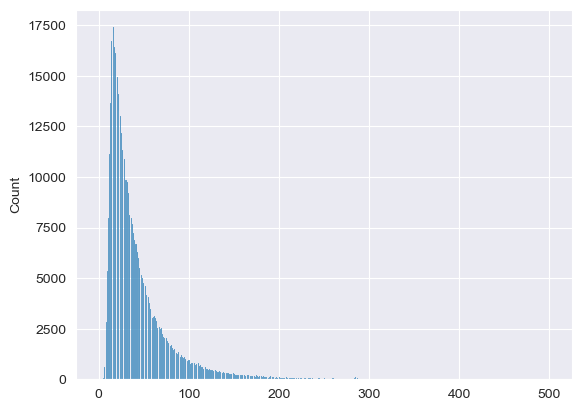

In [33]:
sns.histplot(data=data['Review word length'].values,binrange=(0,500));

In [34]:
data['Review word length'].max()

1948

The plot is highly skewed towards left. Most of the reviews were 0 to 200 words long eventhough the maximum length ofwords is around 2000 long

<a id='monogram'></a>
#### 2.5.3 Monograms analysis

We first join all the textual data into one corpus.

In [35]:
corpus = data['Review'].str.cat(sep=' ')
    
corpus[:1000] #showing the first 1000 characters of the corpus

'good quality dog food bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better not advertised product arrived labeled jumbo salted peanutsthe peanuts actually small sized unsalted not sure error vendor intended represent product jumbo delight says confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven not chewy flavorful highly recommend yummy treat familiar story cs lewis lion witch wardrobe treat seduces edmund selling brother sisters witch cough medicine looking secret ingredient robitussin believe found got addition root beer extract ordered good made cherry soda flavor medicinal great taffy great taffy great price wide assortment yummy taffy delivery quick taffy lover deal nice taffy got wild hair taffy ordered five pound bag taffy enjoyable many flavors watermelon root beer melon pep

<b> Plot of the most 25 frequently used words have been shown</b>

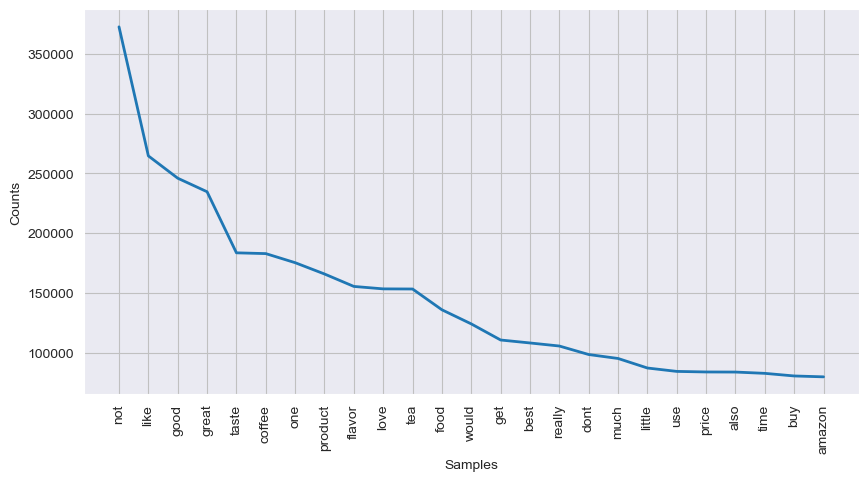

In [37]:
from nltk.probability import FreqDist
tokens = word_tokenize(corpus)
word_freq = FreqDist(tokens)

fig, ax = plt.subplots(figsize=(10,5))
word_freq.plot(25);

<a id='bigram'></a>
#### 2.5.4 Bi-gram analysis

Plot of the most 25 frequently used bigrams have been shown

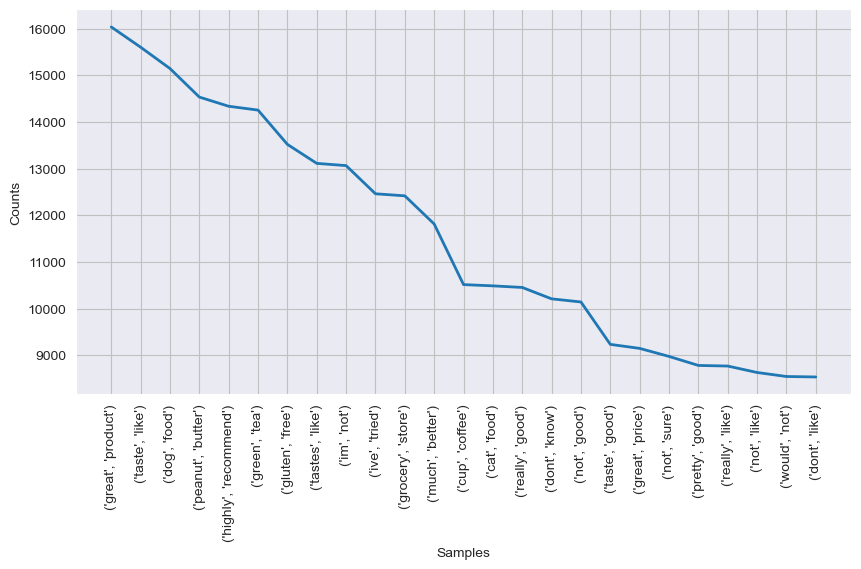

In [38]:
from nltk.util import bigrams, trigrams
tokens_bi = bigrams(tokens)
bigram_freq = FreqDist(tokens_bi)
fig, ax = plt.subplots(figsize=(10,5))
bigram_freq.plot(25);

<a id='trigram'></a>
#### 2.5.5 Trigram analysis

Plot of the 25 most frequently used trigrams have been shown

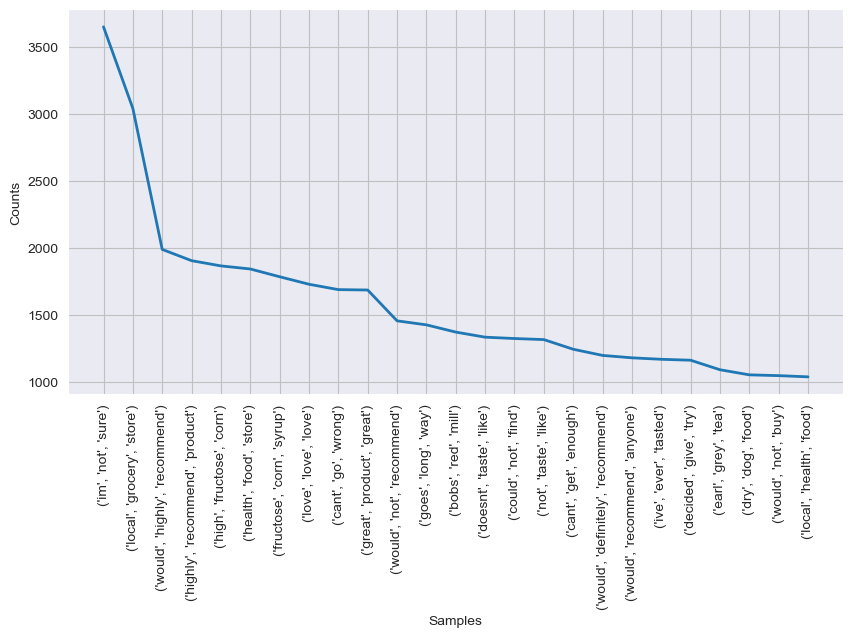

In [39]:
tokens_tri = trigrams(tokens)
trigram_freq = FreqDist(tokens_tri)
fig, ax = plt.subplots(figsize=(10,5))
trigram_freq.plot(25);

<a id='wordcloud'></a>
### 2.6 Datavisualization using wordcloud

Word clouds are an excellent way of visualizing textual data. Following 3 plots show the worldcloud for the different categories of sentiment.

<b>For neutral sentiment reviews</b>

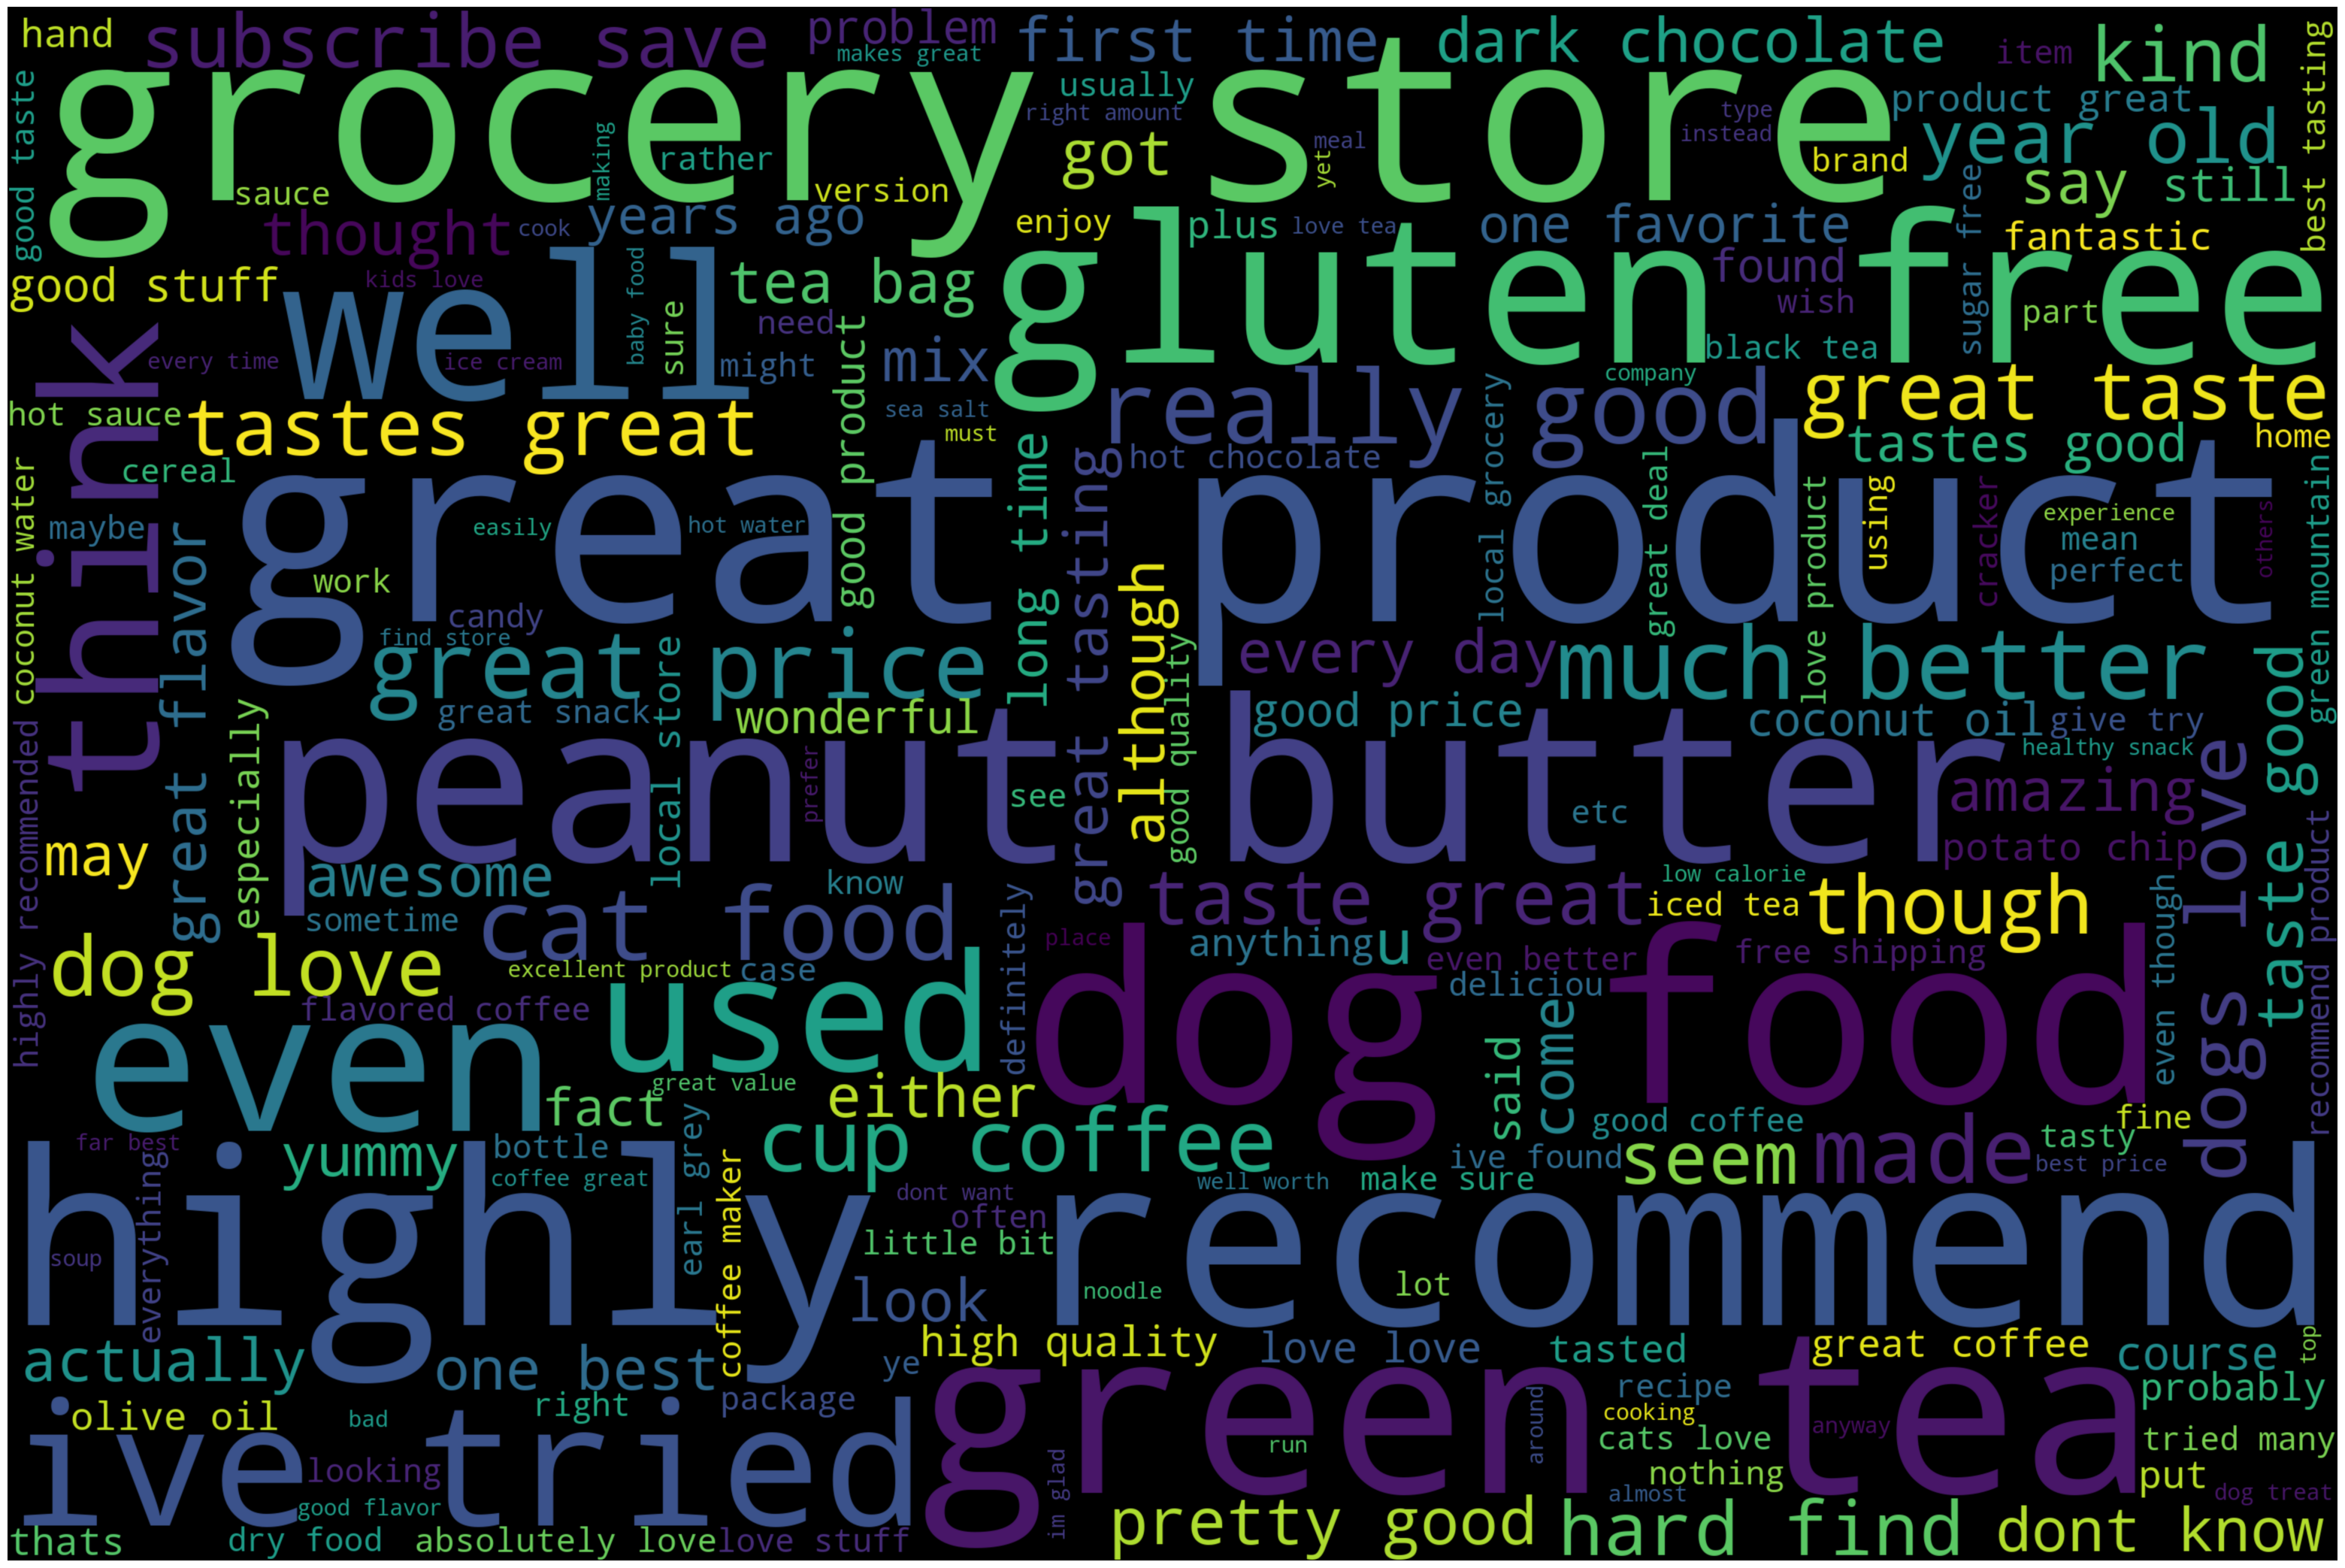

In [41]:
neg_corpus = data['Review'][data['sentiment']=='positive'].str.cat(sep=' ')
from wordcloud import WordCloud
plt.figure(figsize=(40, 30))
wordcloud = WordCloud(width=3000,height=2000,margin=0).generate(neg_corpus)
plt.imshow(wordcloud, interpolation='bicubic')
plt.axis('off')
plt.margins(x=0, y=0)

plt.show()

<b>For negative sentiment reviews</b>

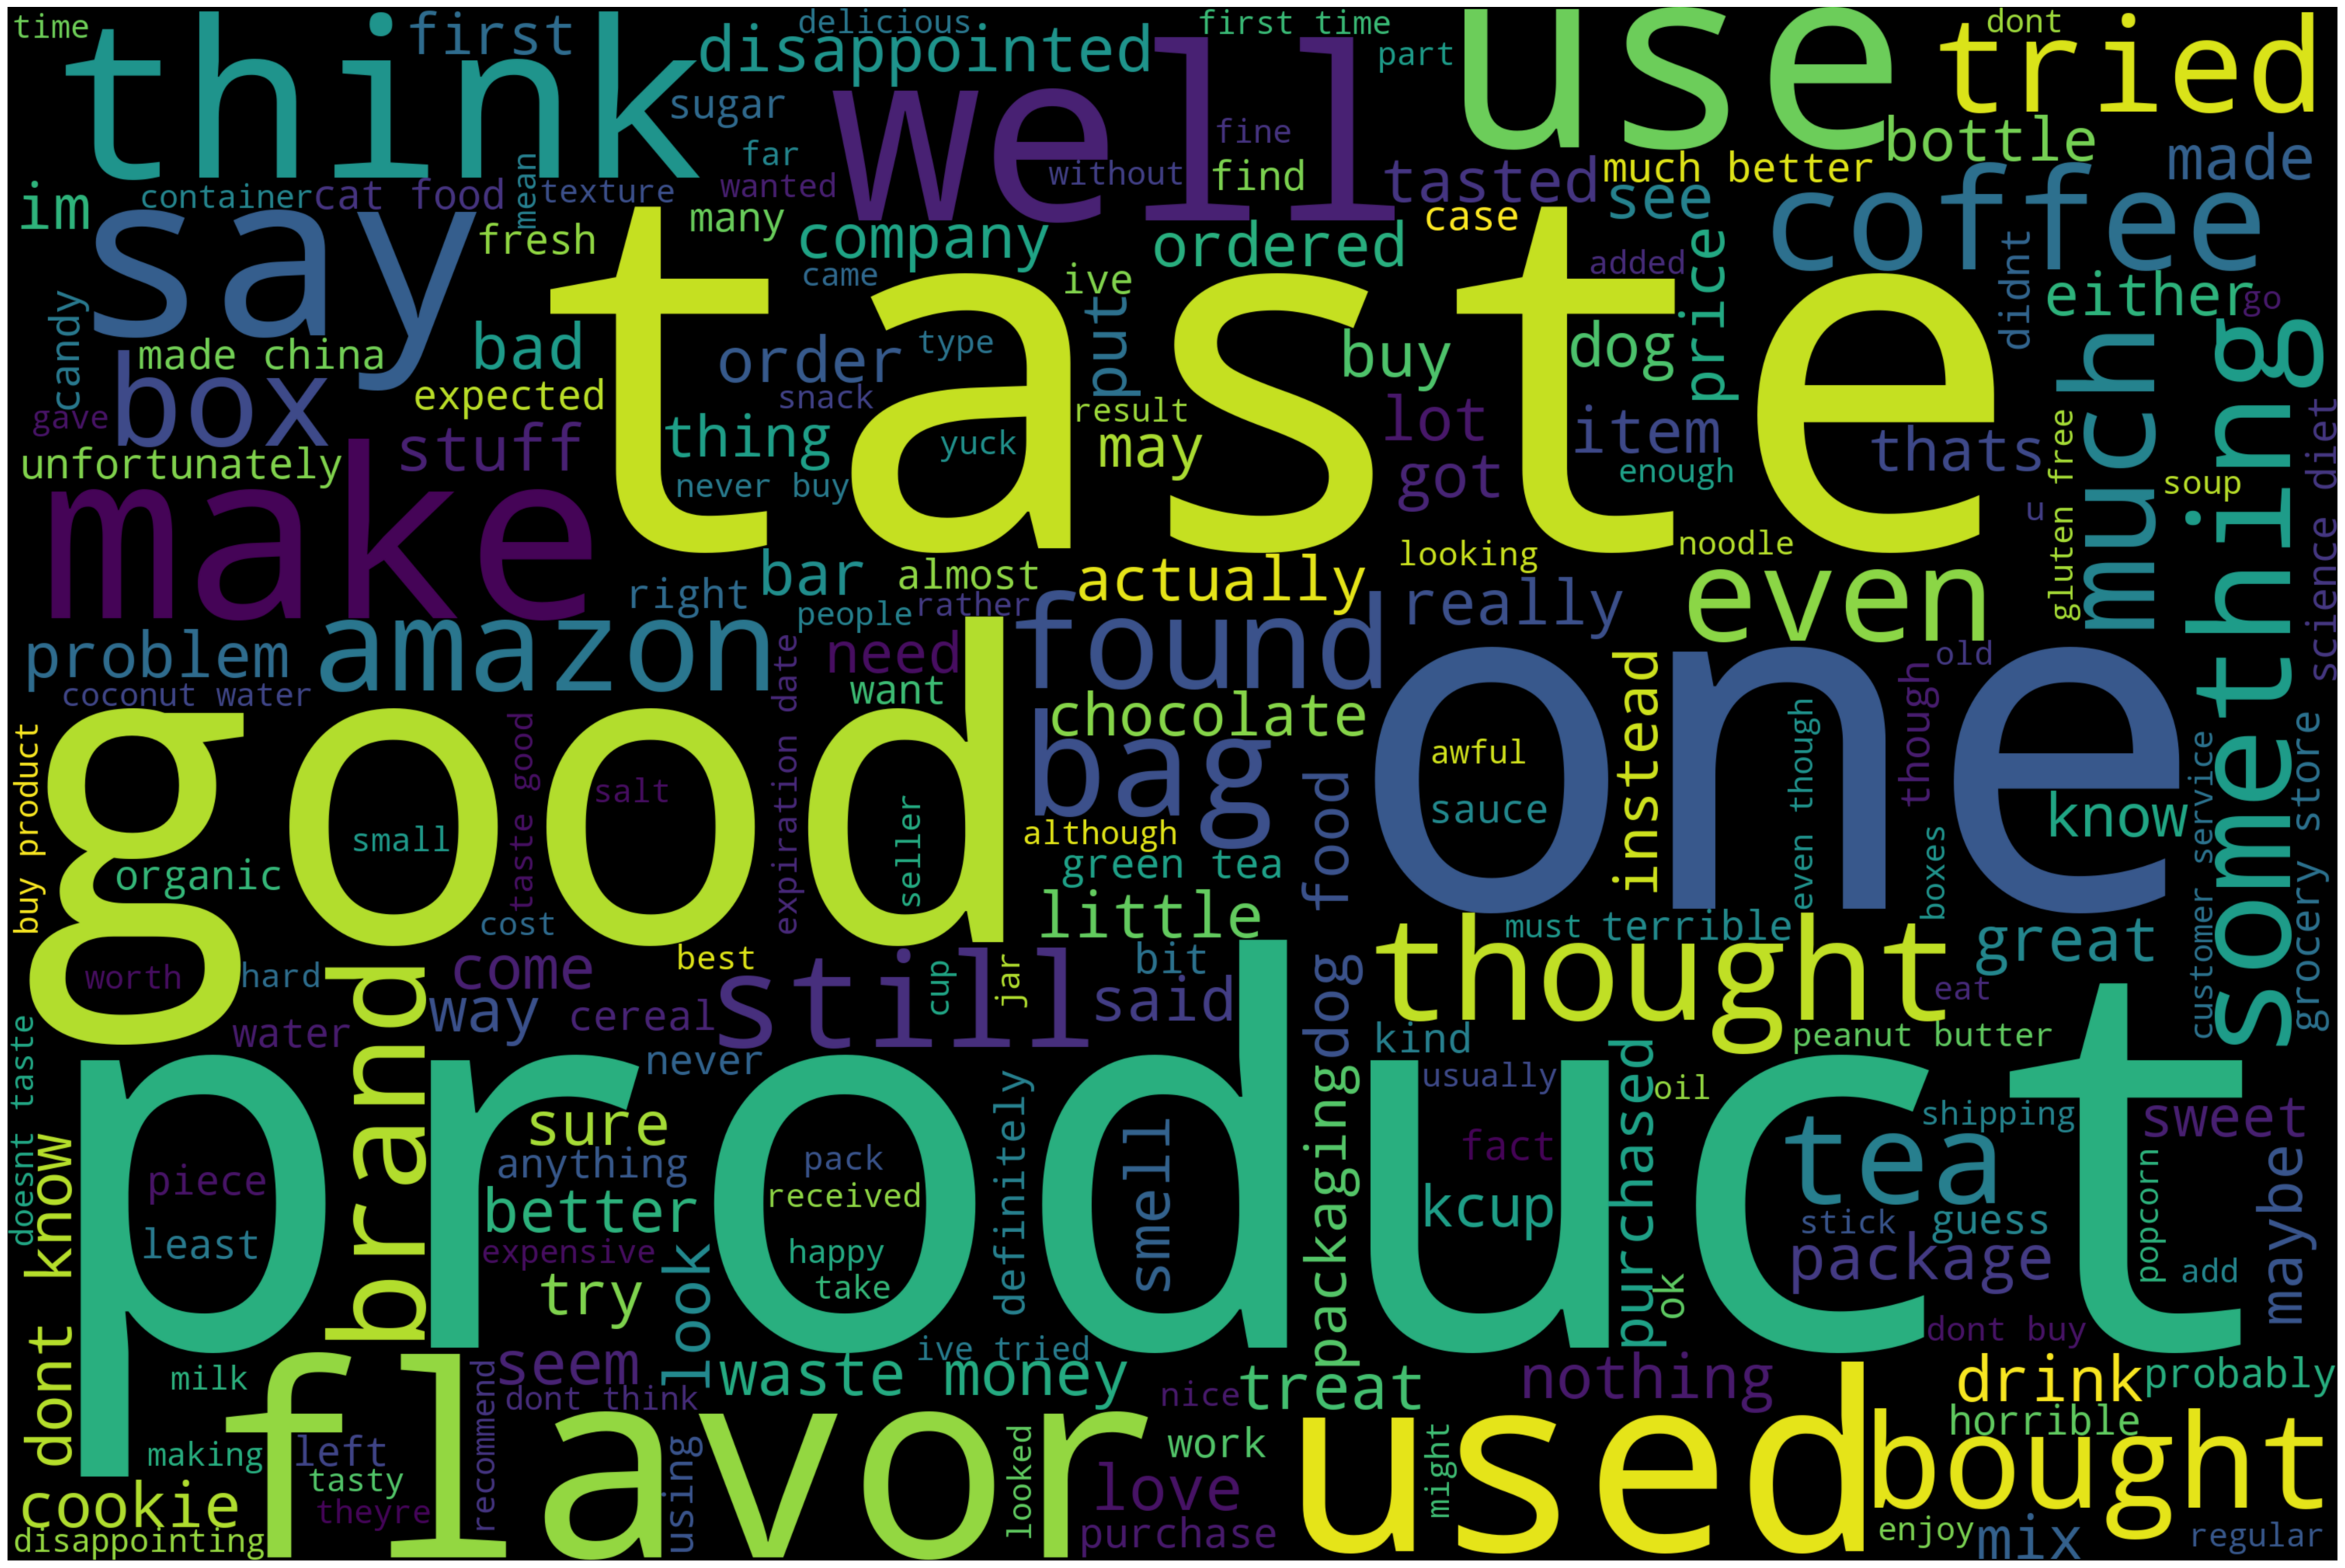

In [42]:
neg_corpus = data['Review'][data['sentiment']=='negative'].str.cat(sep=' ')

wordcloud = WordCloud(width=3000,height=2000,margin=0).generate(neg_corpus)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud, interpolation='bicubic')
plt.axis('off')
plt.margins(x=0, y=0)

plt.show()

<b>For positive sentiment reviews</b>

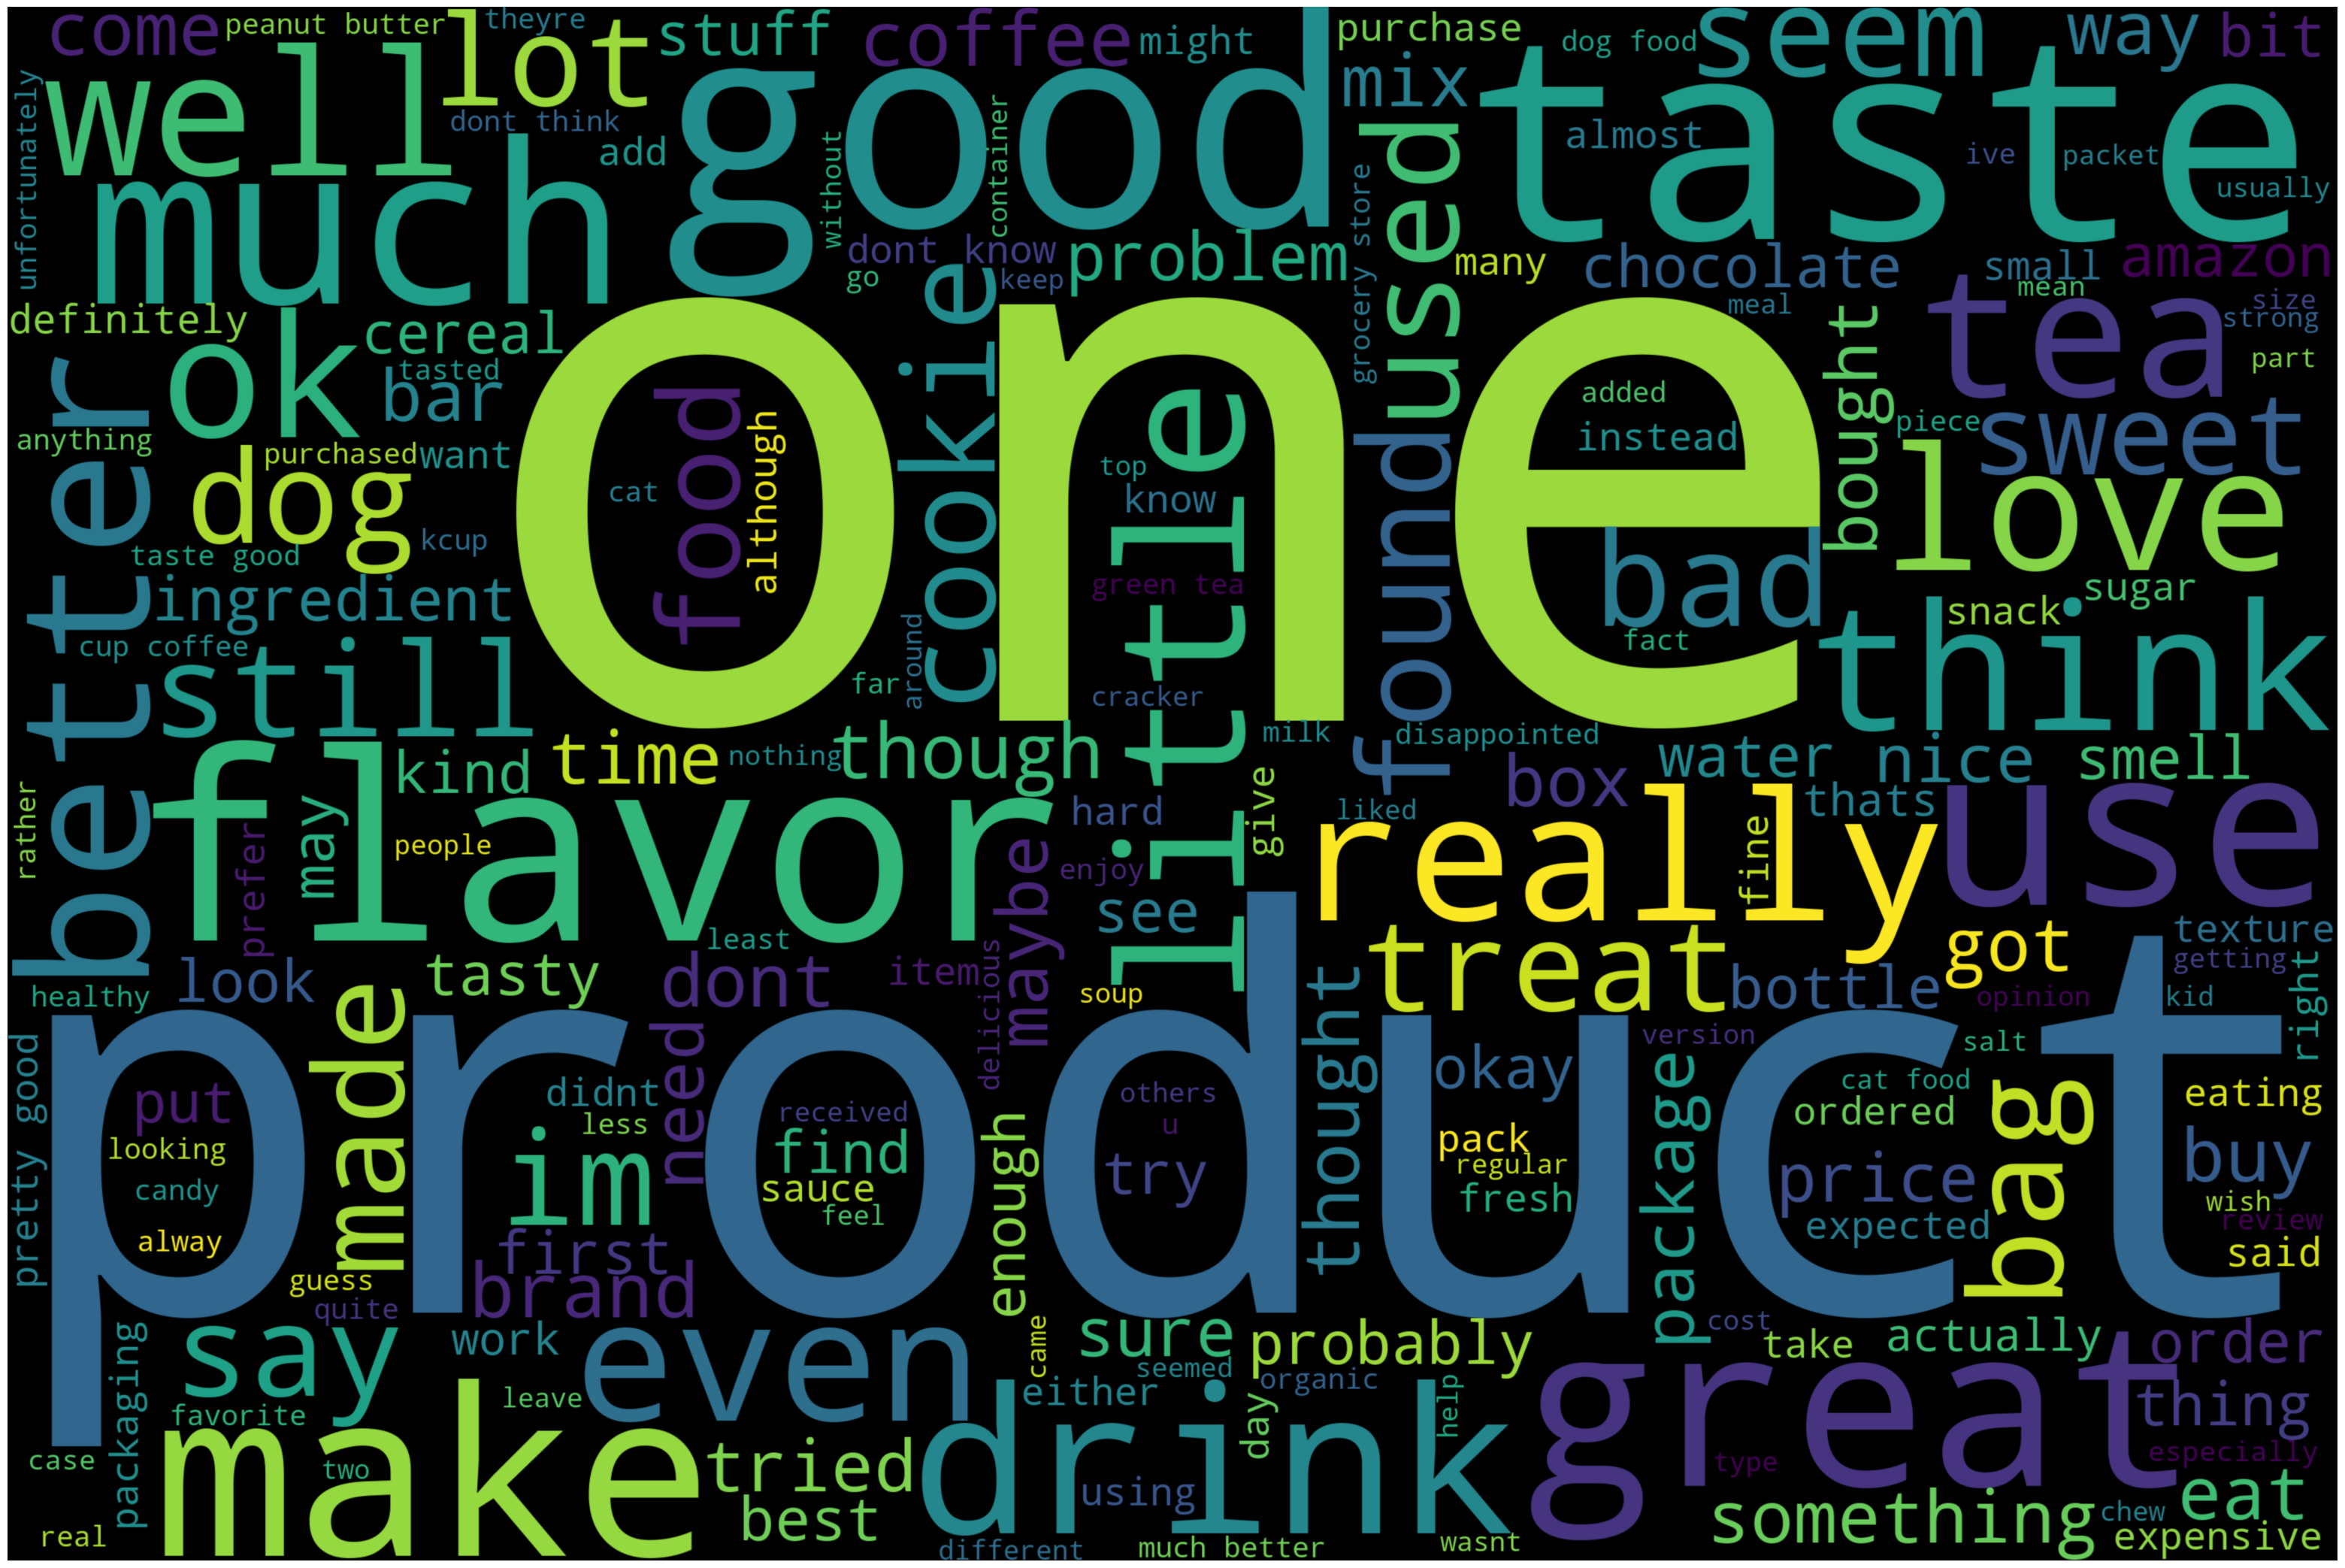

In [43]:
po_corpus = data['Review'][data['sentiment']=='neutral'].str.cat(sep=' ')

wordcloud = WordCloud(width=3000,height=2000,margin=0).generate(po_corpus)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud, interpolation='bicubic')
plt.axis('off')
plt.margins(x=0, y=0)

plt.show()

<a id='saving_data'></a>
### 2.7 Saving the clean data as pandas dataframe

In [3]:
import joblib
joblib.dump(data, filename='./data_file/data.joblib', compress=3)

['./data_file/data.joblib']

In [ ]:
print('hello')

In [ ]:
P